# FACE MASK DETECTION

# IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from PIL import Image
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization
plt.style.use('dark_background')
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical,plot_model


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
encoder=OneHotEncoder()#with mask -0,without-1
encoder.fit([[0],[1]])

OneHotEncoder()

In [7]:
#with mask
data=[]
paths=[]
result=[]
for r,d,f in os.walk(r"D:\anjali\Face Mask Dataset\Train\WithMask"):
    for file in f:
        if'.jpg' or '.jpeg ' or '.png' in file:
            paths.append(os.path.join(r,file))
for path in paths:
    img=Image.open(path)
    img=img.resize((128,128))
    img=np.array(img)
    if(img.shape==(128,128,3)):
            data.append(np.array(img))
            result.append(encoder.transform([[0]]).toarray())
            

In [8]:
#without mask
paths=[]
for r,d,f in os.walk (r"D:\anjali\Face Mask Dataset\Train\WithoutMask"):
      for file in f:
            if '.jpeg' or '.jpg' or '.png' in file :
                paths.append(os.path.join(r,file))
for path in paths:
    img=Image.open(path)
    img=img.resize((128,128))
    img=np.array(img)
    if(img.shape==(128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [9]:
data=np.array(data)
data.shape

(10000, 128, 128, 3)

In [10]:
result=np.array(result)
result=result.reshape(10000,2)

# VISUALIZATION

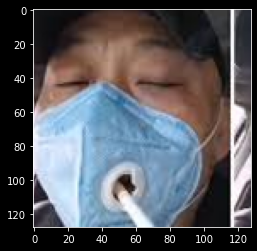

In [11]:
plt.imshow(data[100])

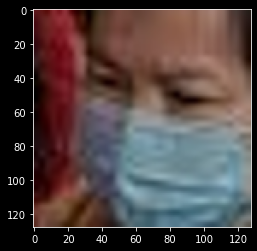

In [12]:
plt.imshow(data[4])

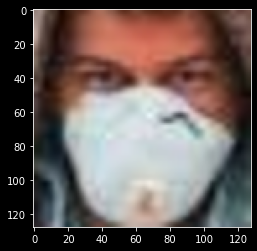

In [14]:
plt.imshow(data[489])

# DATA SPLITTING

In [15]:
x_train,x_test,y_train,y_test=train_test_split(data,result,test_size=0.2,shuffle=True,random_state=45)

# MODEL CREATION

In [16]:
model=Sequential()


model.add(Conv2D(32,kernel_size=(2,2),input_shape=(128,128,3),padding='same'))
model.add(Conv2D(32,kernel_size=(2,2),activation='relu',padding='same'))
model.add(Dropout(0.45))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(64,kernel_size=(2,2),input_shape=(2,2),activation='relu',padding='same'))
model.add(Conv2D(64,kernel_size=(2,2),input_shape=(2,2),activation='relu',padding='same'))
model.add(Dropout(0.45))
          

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))         
          
model.add(Flatten())
          
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
          
model.add(Dense(2,activation='sigmoid'))
print(model.summary())

C:\Users\nair7\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,585,602 (128.12 MB)

 Trainable params: 33,585,410 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

None


In [17]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
x_train.shape

(8000, 128, 128, 3)

In [21]:
y_train.shape

(8000, 2)

In [23]:
x_test.shape

(2000, 128, 128, 3)

In [24]:
history=model.fit(x_train,y_train,epochs=10,batch_size=10,verbose=1)

Epoch 1/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 661s 810ms/step - accuracy: 0.9016 - loss: 2.5817
Epoch 2/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 641s 801ms/step - accuracy: 0.9712 - loss: 0.1106
Epoch 3/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 645s 806ms/step - accuracy: 0.9699 - loss: 0.1115
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 660s 825ms/step - accuracy: 0.9780 - loss: 0.0917
Epoch 5/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 639s 799ms/step - accuracy: 0.9734 - loss: 0.0955
Epoch 6/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 597s 746ms/step - accuracy: 0.9855 - loss: 0.0499
Epoch 7/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 594s 742ms/step - accuracy: 0.9764 - loss: 0.1947
Epoch 8/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 645s 807ms/step - accuracy: 0.9791 - loss: 0.1017
Epoch 9/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 604s 755ms/step - accuracy: 0.9851 - loss: 0.0595
Epoch 10/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 629s 786ms/step - accuracy: 0.9895 - loss: 0.0388


In [28]:
score=model.evaluate(x_test,y_test,batch_size=64)
print("\n Test accuracy  :%.1f%%"%(100*score[1]))

32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 232ms/step - accuracy: 0.9504 - loss: 0.1812

 Test accuracy  :94.8%


# PLOT GRAPH

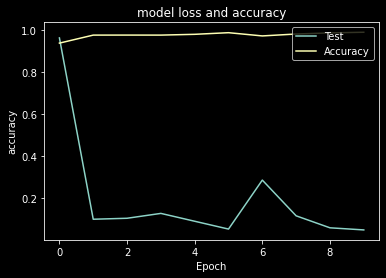

In [25]:
import  matplotlib.pyplot  as plt
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('model loss and accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(['Test','Accuracy'],loc= 'upper right')
plt.show()

In [26]:
def names(result):
    if(result==0):
        return'with mask'
    else:
        return'without mask'

# MODEL PREDICTION

x after resizing : (1, 128, 128, 3)
84.906667470932% confidence is a with mask


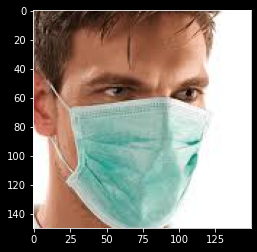

In [30]:
from matplotlib.pyplot import imshow
img=Image.open(r"D:\anjali\Face Mask Dataset\Train\WithMask\69.png")
x=np.array(img.resize((128,128)))
x=x.reshape(1,128,128,3)
print('x after resizing :',x.shape)
output=model.predict_on_batch(x)
classification=np.where(output==np.amax(output))[1][0]
imshow(img)
print(str(output[0][classification]*100)+'% confidence is a '+names(classification))

x after resizing : (1, 128, 128, 3)
97.4982738494873% confidence is a without mask


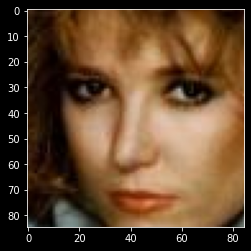

In [31]:
from matplotlib.pyplot import imshow
img=Image.open(r"D:\anjali\Face Mask Dataset\Train\WithoutMask\20.png")
x=np.array(img.resize((128,128)))
x=x.reshape(1,128,128,3)
print('x after resizing :',x.shape)
output=model.predict_on_batch(x)
classification=np.where(output==np.amax(output))[1][0]
imshow(img)
print(str(output[0][classification]*100)+'% confidence is a '+names(classification))

x after resizing : (1, 128, 128, 3)
99.99963641166687% confidence is a with mask


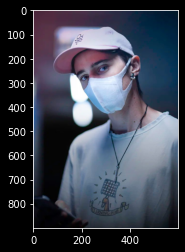

In [32]:
from matplotlib.pyplot import imshow
img=Image.open(r"D:\New folder\withmask.jpg")
x=np.array(img.resize((128,128)))
x=x.reshape(1,128,128,3)
print('x after resizing :',x.shape)
output=model.predict_on_batch(x)
classification=np.where(output==np.amax(output))[1][0]
imshow(img)
print(str(output[0][classification]*100)+'% confidence is a '+names(classification))

x after resizing : (1, 128, 128, 3)
100.0% confidence is a with mask


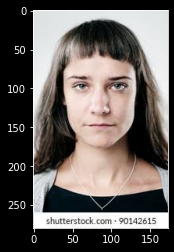

In [33]:
from matplotlib.pyplot import imshow
img=Image.open(r"D:\New folder\without mask .jpg")
x=np.array(img.resize((128,128)))
x=x.reshape(1,128,128,3)
print('x after resizing :',x.shape)
output=model.predict_on_batch(x)
classification=np.where(output==np.amax(output))[1][0]
imshow(img)
print(str(output[0][classification]*100)+'% confidence is a '+names(classification))